# Learning outcomes
1. Geometric transformations: rotation, translation, affine transformation and perspective transformation.
2. Drawing functions
- line
- circle
- ellipse
- rectangle
- text
3. Bitwise operations
- OR, AND, XOR, NOT
4. Convolution: Smoothing and sharpening. This operations are central to CNN.

## Setup

In [1]:
import sys
assert sys.version_info >= (3, 7)

import numpy as np
import cv2 as cv
from util_func import *

In [2]:
!pip install scipy


[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: C:\Users\user\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


## Geometric transformation

In [3]:
img  = cv.imread("images/lena.jfif")

h, w = img.shape[:2]
tx = 50
ty = 80
M = np.float32([[1, 0, tx], [0, 1, ty]])

dst = cv.warpAffine(img, M, (w+tx, h+ty))

show_img("translation", dst)

### Rotation

In [12]:
yc, xc = h // 2, w // 2
angle = 45

M = cv.getRotationMatrix2D((xc, yc), angle, 1)
dst = cv.warpAffine(img, M, (w, h))

show_img("Rotation", dst)

## Affine transformation

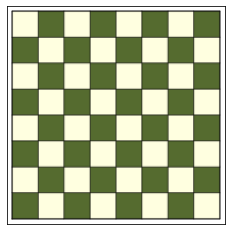

In [15]:
img = cv.imread("images/chessboard.png")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_copy = img.copy()

plt_img(img)

<function matplotlib.pyplot.show(close=None, block=None)>

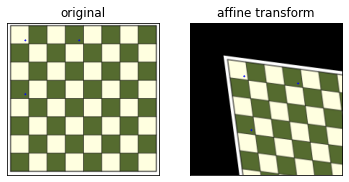

In [18]:
h, w = img.shape[:2]
# 3 pair of points
p0 = np.float32([[25, 25], [100, 25], [25, 100]])
p1 = np.float32([[75, 75], [150, 85], [85, 150]])

for pt in p0:
    cv.circle(img, (int(pt[0]), int(pt[1])), 1, (0, 0, 255), -1)
    
#get the M
M = cv.getAffineTransform(p0, p1)
dst = cv.warpAffine(img_copy, M, (w, h))

for pt in p1:
    cv.circle(dst, (int(pt[0]), int(pt[1])), 1, (0, 0, 255), -1)
    
plt.subplot(121), plt_img(img, title="original")
plt.subplot(122), plt_img(dst, title="affine transform")
plt.show

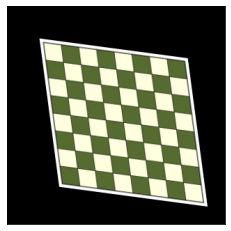

In [21]:
dst_new = cv.warpAffine(img_copy, M, (w+75, h+75))

plt_img(dst_new)

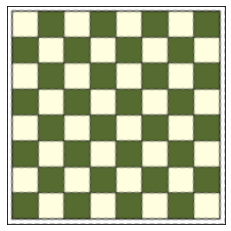

In [20]:
M_inv = cv.getAffineTransform(p1, p0)
ori_restore = cv.warpAffine(dst_new, M_inv, (w, h))

plt_img(ori_restore)

### Perspective transform

In [23]:
img = cv.imread("images/dice.jfif")

show_img("name card", img, adjust=True)

In [36]:
# to get the corners, mouse callback function
p = []

def mouse(event, x, y, flags, params):
    if event == cv.EVENT_LBUTTONDOWN:
        print((x, y))
        p.append((x,y))
        cv.circle(img, (x, y), 2, (0, 0, 255), -1)
        cv.imshow("img", img)
        
cv.imshow("img", img)
cv.setMouseCallback("img", mouse)
cv.waitKey(0)
cv.destroyAllWindows()

(12, 68)
(79, 97)
(82, 136)
(20, 106)


In [3]:
from scipy.spatial.distance import euclidean

In [38]:
w1 = euclidean(p[0], p[1])
w2 = euclidean(p[2], p[3])

h1 = euclidean(p[0], p[3])
h2 = euclidean(p[1], p[2])

H = max(h1, h2)
W = max(w1, w2)

p_array = np.float32(p)
dst = np.float32([[0, 0], [W-1, 0], [W-1, H-1], [0, H-1]])

M = cv.getPerspectiveTransform(p_array, dst)
warp = cv.warpPerspective(img, M, (int(W), int(H)))

cv.namedWindow("img", cv.WINDOW_NORMAL)
cv.imshow("img", img)
show_img("warp", warp)

## Drawing functions

### Line

In [39]:
img = cv.imread("images/dog.jfif")

print(img.shape)

(168, 300, 3)


In [41]:
img_copy = img.copy()
cv.line(img_copy, (80, 150), (200, 50), (0, 0, 255), 4, cv.LINE_AA)
show_img("line", img_copy)

### Circle

In [43]:
img_copy = img.copy()
cv.circle(img_copy, (145, 50), 40, (100, 100, 100), 2, cv.LINE_AA)
show_img("circle", img_copy)

### Ellipse

In [46]:
img_copy = img.copy()
axes = (50, 25)
angle = 0

cv.ellipse(img_copy, (145, 50),axes, angle, 0, 360, (50, 100, 150), 2)
show_img("ellipse", img_copy)

### Rectangle

In [48]:
img_copy = img.copy()
cv.rectangle(img_copy, (100, 10), (190, 90), (0, 0, 255), 4, cv.LINE_AA)
show_img("rectangle", img_copy)

### Text

In [50]:
img_copy = img.copy()

cv.putText(img_copy, "I am a happy dog!", (15, 150), cv.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 60), 2)
show_img("Text", img_copy)

### Exercise

In [47]:
# Create a dark grayscale image (2D array)
img = np.zeros((200, 200), dtype="uint8")
yc, xc = img.shape[0] // 2, img.shape[1] // 2
radius = [10, 20, 30, 40, 50, 60, 70, 80]
for radius in radius:
    cv.circle(img, (xc, yc), radius, (255, 255, 255), 2, cv.LINE_AA)
cv.putText(img, "Bulleye", (10, 190), cv.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 60), 2)

show_img("Text", img)

In [65]:
# Sample answer
img = np.zeros((400, 400), dtype="uint8")

yc, xc = img.shape[0] // 2, img.shape[1] // 2

radius = np.arange(20, 200, 15)

for r in radius:
    cv.circle(img, (xc, yc), r, 255, 2)
    
cv.putText(img, "Bulleye", (20, 385), cv.FONT_HERSHEY_SIMPLEX, 0.6, 255, 2)
show_img("bulleye", img)

### Demo
We can develop a simple drawing tool / app with OpenCV GUI. Trackbar introduction

In [67]:
WHITE = (255, 255, 255)
RED = (0, 0, 255)
BLUE = (255, 0, 0)
GREEN = (0, 255, 0)

CYAN = (255, 255, 0)
MAGENTA = (255, 0, 255)
YELLOW = (0, 255, 255)

colors = (RED, BLUE, GREEN, CYAN, MAGENTA, YELLOW, WHITE)

#define trackbar function, mouse callback function and finally a white loop to drawing
def nothing(x):
    pass

p0 = p1 = (0, 0)
def mouse(event, x, y, flags, params):
    global p0, p1
    if event == cv.EVENT_LBUTTONDOWN:
        p0 = (x, y)
        
    elif event == cv.EVENT_LBUTTONUP:
        p1 = (x, y)
        
        d = cv.getTrackbarPos("thickness", "window")
        if d==0:
            d = -1
        i = cv.getTrackbarPos("color", "window")
        color = colors[i]
        cv.rectangle(img, p0, p1, color, d)
        cv.imshow("window", img)

img = np.zeros((400, 400, 3), dtype=np.uint8)
cv.namedWindow("window")
cv.createTrackbar("color", "window", 0, 6, nothing)
cv.createTrackbar("thickness", "window", 0, 10, nothing)
cv.setMouseCallback("window", mouse)

while(1):
    cv.imshow("window", img)
    k = cv.waitKey(1) & 0xFF
    if k==27:
        break
    
    if k == ord('c'):
        img[:] = 0
        
cv.destroyAllWindows()

### BItwise operators

In [7]:
rect = np.zeros((400, 400), dtype=np.uint8)
rect[30:370, 30:370] = 255

circle = np.zeros((400, 400), dtype=np.uint8)
cv.circle(circle, (200, 200), 200, 255, -1)

cv.imshow("rect", rect)
show_img("circle", circle)

In [8]:
res_AND = cv.bitwise_and(rect, circle)
show_img("AND", res_AND)

In [9]:
res_OR = cv.bitwise_or(rect, circle)
show_img("OR", res_OR)

In [10]:
res_XOR = cv.bitwise_xor(rect, circle)
show_img("XOR", res_XOR)

In [11]:
res_NOT = cv.bitwise_not(rect, circle)
show_img("NOT", res_NOT)

bitwise operations is one of the important process that make up segmentation pipeline.

In [12]:
img = cv.imread("images/dog.jfif")

# masking
h, w = img.shape[:2]
mask = np.zeros((h, w), dtype=np.uint8)

cv.circle(mask, (145, 50), 40, 255, -1)

face = cv.bitwise_and(img, img, mask=mask)

show_img("face", face)

## Convolution

### Identity kernel

In [13]:
kernel = np.zeros((3, 3))
kernel[1, 1] = 1

img = cv.imread("images/opencv_logo.png")

dst = cv.filter2D(img, -1, kernel)

cv.imshow("img", img)
show_img("identity", dst)

### Use cases
- CNN
- Smoothing / denoising
- edge detection
- sharperning

In [14]:
# sharpening
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

img = cv.imread("images/dog.jfif")
sharpen = cv.filter2D(img, -1, kernel)

cv.imshow("img", img)
show_img("sharpen", sharpen)

In [50]:
# Blurring
kernel = np.ones((5, 5)) / 25.0

blur = cv.filter2D(img, -1, kernel)

show_img("blur", blur)
print(blur)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [16]:
unsharp_masking = cv.addWeighted(img, 1.75, blur, -0.75, 0)

show_img("sharp", unsharp_masking)

### Blurring
4 functions:
- `cv.blur`: Average filter
- `cv.GaussianBlur()`: Gaussian filter, efficient in removing Gaussian noise
- `cv.medianBlur()`: Median filter, eliminating salt and pepper noise
- `cv.bilateralFilter()`: edge-preserving filter

## Weekly activity
1. Rotate image by 45 degrees without cropping the sides of the image. (Hint: There are 2 strategies to tackle these problems). Use "lena.jfif" as the input image.
- Use external libraries imutils.
- Modify the transformation matrix.

2. Use the images with titles: "flower.jfif" and "native-bee.png". I want to put flower above an image. If I add two images, it will change color. If I blend it, I get a transparent effect. But I want it to be opaque. If it was a rectangular region, we could use the ROI as we did in the previous section. But flower is not a rectangular region. This is where bitwise operations, like AND, OR, NOT and XOR really come in handy. The associated functions are cv.bitwise_and(), cv.bitwise_or() and cv.bitwise_not(). You need to use cv.threshold function to segment the flower. Please refer to online documentation for more info. The result should resemble the following:

3. Apply custom sharpening kernel of aperture size 3 and 5 as shown below on 'native-bee.png':What can you infer from the outputs?

4. Apply different image smoothing techniques (e.g. average filter, Gaussian kernel and median filter) on 'noise_lena.jpg' and display the resulting images after the convolution. Comment on the outcomes and deduce the type of noise present on the image.

In [4]:
pip install imutils

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: C:\Users\user\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [8]:
# Question 1
import imutils

img = cv.imread("images/lena.jfif")

rotated_image = imutils.rotate_bound(img, angle=45)

# Display the original and rotated images
show_img("Rotation", rotated_image)

In [70]:
# Question 2
# Load the images
img1 = cv.imread('images/native-bee.png')
img2 = cv.imread('images/flower.jfif')

# Create a ROI to put logo on top-left corner
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols]

# The threshold value is set to 70 because there are some background for the flower contain a bit of light
img2gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(img2gray, 70, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)

# Black-out the area of logo in ROI
img1_bg = cv.bitwise_and(roi,roi,mask = mask_inv)

# Take only region of logo from logo image.
img2_fg = cv.bitwise_and(img2,img2,mask = mask)

# Put logo in ROI and modify the main image
dst = cv.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst

show_img("res", img1)
cv.waitKey(0)
cv.destroyAllWindows()

In [75]:
# Question 3
# Load the image
img = cv.imread("images/native-bee.png")

# Custom kernels
kernel_3x3 = np.array([[0, -1, 0],
                       [-1,  5, -1],
                       [0, -1, 0]])

kernel_5x5 = np.array([[-1, -1, -1, -1, -1],
                       [-1, -1, -1, -1, -1],
                       [-1, -1, 25, -1, -1],
                       [-1, -1, -1, -1, -1],
                       [-1, -1, -1, -1, -1]])

# Apply the custom kernels
sharpened_3x3 = cv.filter2D(img, -1, kernel_3x3)
sharpened_5x5 = cv.filter2D(img, -1, kernel_5x5)

# Display the 3x3 and 5x5 sharpened picture
cv.imshow('Original', img)
cv.imshow('Sharpened 3x3', sharpened_3x3)
cv.imshow('Sharpened 5x5', sharpened_5x5)

cv.waitKey(0)
cv.destroyAllWindows()
# The sharpening effect of 5x5 is more powerful than kernel 3x3

In [77]:
# Question 4
#Apply different image smoothing techniques (e.g. average filter, Gaussian kernel and median filter) on 'noise_lena.jpg' 
#and display the resulting images after the convolution. Comment on the outcomes and deduce the type of noise present on 
#the image.

# Load the image
img = cv.imread('images/noise_lena.jpg')

# Apply Average Filter, cv.blur(src, ksize), ksize is the size of kernel
average = cv.blur(img, (3, 3))

# Apply Gaussian Filter, cv.GaussianBlur(src, ksize, sigmaX)
gaussian = cv.GaussianBlur(img, (3, 3), 0)

# Apply Median Filter, cv.medianBlur(src, ksize)
median = cv.medianBlur(img, 3)

# Display the original and filtered images
cv.imshow('Original', img)
cv.imshow('Average Filtered', average)
cv.imshow('Gaussian Filtered', gaussian)
cv.imshow('Median Filtered', median)

cv.waitKey(0)
cv.destroyAllWindows()
# The type of noise is salt and pepper. Median filter is the most effective in removing the salt and pepper noise. The result
# of gaussian filter and average filter is almost the same. Not too effective.